**Se cargan librerías**

In [144]:
import pandas as pd
import numpy as np
import ast
import gzip
import json
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving user_reviews.json.gz to user_reviews.json.gz


In [145]:
user_reviews = "user_reviews.json.gz"
filas=[]
with gzip.open(user_reviews, 'rt', encoding='MacRoman') as archivo:
    for line in archivo.readlines():
        filas.append(ast.literal_eval(line))
#Transformamos a un dataframe#
user_review = pd.DataFrame(filas)

In [146]:
user_review

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


In [147]:
user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   25799 non-null  object
 1   user_url  25799 non-null  object
 2   reviews   25799 non-null  object
dtypes: object(3)
memory usage: 604.8+ KB


In [149]:
#Chequeamos los valores nulos#
user_review.isnull().sum()

user_id     0
user_url    0
reviews     0
dtype: int64

In [150]:
#Chequeamos duplicados#
duplicados = user_review[user_review.duplicated("user_id", keep=False)]
duplicados

,user_id,user_url,reviews
9,76561198156664158,http://steamcommunity.com/profiles/76561198156...,"[{'funny': '', 'posted': 'Posted June 16.', 'l..."
50,Rivtex,http://steamcommunity.com/id/Rivtex,"[{'funny': '', 'posted': 'Posted December 23, ..."
83,76561198094224872,http://steamcommunity.com/profiles/76561198094...,[]
119,DieMadchenschanderin,http://steamcommunity.com/id/DieMadchenschanderin,"[{'funny': '', 'posted': 'Posted August 29, 20..."
147,relesprit,http://steamcommunity.com/id/relesprit,"[{'funny': '', 'posted': 'Posted December 27, ..."
...,...,...,...
17819,76561198076474887,http://steamcommunity.com/profiles/76561198076...,"[{'funny': '', 'posted': 'Posted April 12.', '..."
17916,yolofaceguy,http://steamcommunity.com/id/yolofaceguy,"[{'funny': '', 'posted': 'Posted October 31, 2..."
18028,76561198075591109,http://steamcommunity.com/profiles/76561198075...,"[{'funny': '', 'posted': 'Posted December 26, ..."
18234,76561198092022514,http://steamcommunity.com/profiles/76561198092...,"[{'funny': '', 'posted': 'Posted July 3.', 'la..."


In [151]:
user_id = "76561198076474887"
user_rows = duplicados.loc[duplicados["user_id"] == user_id, "reviews"]
for review_list in user_rows:
    for review in review_list:
        print(review)
    print("-" * 40)
    #Chequeamos que efectivamente el comentario se encuentre repetido y no sea un mismo usuario realizando dos comentarios diferentes#

{'funny': '', 'posted': 'Posted April 12.', 'last_edited': '', 'item_id': '368230', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'Excelente e cada vez mais bonito.Comprei o jogo pouco tempo depois de seu lan√ßamento, e cheguei as minhas primeiras 24 horas jogadas em um piscar de olhos. Com jogabilidade simples, bela musica e arte o jogo me conquistou quase que de imediato.Devo admitir que ap√≥s algumas horas de jogo, me senti frustrado com alguns bugs falhas na contru√ß√£o do mundo que fui encontrando enquanto ia evoluindo ou ap√≥s comessar um novo jogo. Porem, ap√≥s a ultima atualiza√ß√£o, o jogo prativcamente se transformou, mantendo a sua premissa mas se tornando mais belo ( tanto a qualidade e a variedade de suas m√∫sicas quando a arte visual como um todo) e muito mais din√¢mico e coeso.Obrigado por ensinar os personagens a correr :D.Build, defend, expand.'}
----------------------------------------
{'funny': '', 'posted': 'Posted April 12.', 'last_edited': '', 'item_id

In [152]:
user_review = user_review.drop_duplicates(subset="user_id", keep=False) #Eliminamos duplicados#
user_review

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


In [153]:
user_review["reviews"][0]

[{'funny': '',
  'posted': 'Posted November 5, 2011.',
  'last_edited': '',
  'item_id': '1250',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': 'Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.'},
 {'funny': '',
  'posted': 'Posted July 15, 2011.',
  'last_edited': '',
  'item_id': '22200',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': "It's unique and worth a playthrough."},
 {'funny': '',
  'posted': 'Posted April 21, 2011.',
  'last_edited': '',
  'item_id': '43110',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': 'Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do a sequel...so buy the game so I get a sequel!'}]

In [169]:
#Habiéndose chequeado al analizar la estructura que los datos se encuentran anidados, utilizamos la función explode para poder desanidar y así avanzar con el análisis.
user_review_explode = user_review.explode('reviews') #Se duplican las listas generando un diccionario
user_review_explode = pd.concat([user_review_explode.drop(['reviews'],axis=1),user_review_explode['reviews'].apply(pd.Series)],axis=1)
#Se transforman los diccionarios a pandas luego de ser concatenados#


In [170]:
user_review_explode.shape

(57595, 10)

In [171]:
user_review_explode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57595 entries, 0 to 25798
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      57595 non-null  object 
 1   user_url     57595 non-null  object 
 2   funny        57568 non-null  object 
 3   posted       57568 non-null  object 
 4   last_edited  57568 non-null  object 
 5   item_id      57568 non-null  object 
 6   helpful      57568 non-null  object 
 7   recommend    57568 non-null  object 
 8   review       57568 non-null  object 
 9   0            0 non-null      float64
dtypes: float64(1), object(9)
memory usage: 4.8+ MB


In [173]:
conteo_valores_vacios = user_review_explode.apply(lambda col: col[col == ""].count())
conteo_valores_vacios

user_id            0
user_url           0
funny          49698
posted             0
last_edited    51632
item_id            0
helpful            0
recommend          0
review            30
0                  0
dtype: int64

In [174]:
user_review_explode.drop(columns=['user_url','funny','helpful','last_edited',0],inplace=True)
#Tres columnas contienen valores vacíos. "funny" y "last_edited" no serán necesarias por lo tanta se eliminan junta a otras tampoco necesarias.#

In [134]:
user_review_explode

,user_id,posted,item_id,recommend,review
0,76561197970982479,"Posted November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...
0,76561197970982479,"Posted July 15, 2011.",22200,True,It's unique and worth a playthrough.
0,76561197970982479,"Posted April 21, 2011.",43110,True,Great atmosphere. The gunplay can be a bit chu...
1,js41637,"Posted June 24, 2014.",251610,True,I know what you think when you see this title ...
1,js41637,"Posted September 8, 2013.",227300,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...
25797,76561198312638244,Posted July 10.,70,True,a must have classic from steam definitely wort...
25797,76561198312638244,Posted July 8.,362890,True,this game is a perfect remake of the original ...
25798,LydiaMorley,Posted July 3.,273110,True,had so much fun plaing this and collecting res...
25798,LydiaMorley,Posted July 20.,730,True,:D


**Se crea la columna correspondiente al análisis de sentimiento y luego se elimina review**

In [175]:
#Hago el analisis de sentimiento en la columna review
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
modelo_sentimiento = SentimentIntensityAnalyzer()


def analizador(review):
    # Obtener el puntaje de sentimiento usando SentimentIntensityAnalyzer
    sentimiento_puntaje = modelo_sentimiento.polarity_scores(review)

    # Clasifico el sentimiento

    if review and not pd.isnull(review):
        if sentimiento_puntaje['compound'] >= 0.5:
            return 2  # Sentimiento positivo
        elif sentimiento_puntaje['compound'] <= -0.5:
            return 0  # Sentimiento negativo
        else:
            return 1  # Sentimiento neutral
    else:
        return 1

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [177]:
user_review_explode['review'].fillna('',inplace=True) # Se reemplazan los nulos con un string vacío

In [178]:
user_review_explode['sentiment_analysis']  = user_review_explode['review'].apply(analizador)
user_review_explode.drop(columns='review',inplace=True) # Aplica la funcion que determina el sentimiento

**Se grafica el análisis de sentimiento**

<Axes: xlabel='sentiment_analysis', ylabel='Count'>

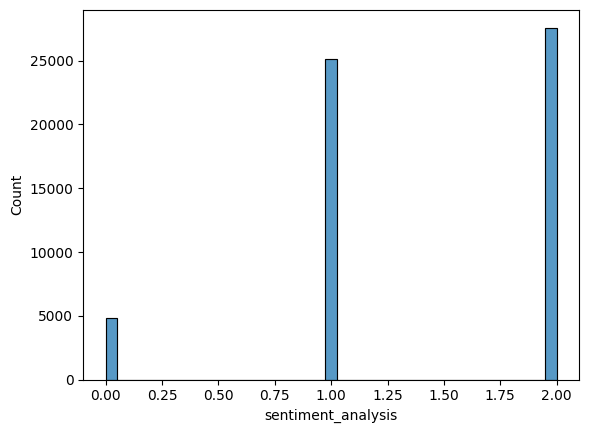

In [179]:
sns.histplot(data=user_review_explode,x='sentiment_analysis')

Se realiza la búsqueda de los nulos que persisten



In [180]:
user_review_explode.isnull().sum()

user_id                0
posted                27
item_id               27
recommend             27
sentiment_analysis     0
dtype: int64

In [181]:
user_review_explode[user_review_explode.isnull().any(axis=1)]

,user_id,posted,item_id,recommend,sentiment_analysis
62,gdxsd,NaN,NaN,NaN,1
1047,76561198021575394,NaN,NaN,NaN,1
3954,cmuir37,NaN,NaN,NaN,1
5394,Jaysteeny,NaN,NaN,NaN,1
6135,ML8989,NaN,NaN,NaN,1
7583,76561198079215291,NaN,NaN,NaN,1
7952,76561198079342142,NaN,NaN,NaN,1
9894,76561198061996985,NaN,NaN,NaN,1
10381,76561198108286351,NaN,NaN,NaN,1
10560,CallTripleZero,NaN,NaN,NaN,1


In [182]:
user_review_explode.dropna(inplace=True) #Se eliminan los nulos#

In [183]:
user_review_explode

,user_id,posted,item_id,recommend,sentiment_analysis
0,76561197970982479,"Posted November 5, 2011.",1250,True,2
0,76561197970982479,"Posted July 15, 2011.",22200,True,1
0,76561197970982479,"Posted April 21, 2011.",43110,True,2
1,js41637,"Posted June 24, 2014.",251610,True,2
1,js41637,"Posted September 8, 2013.",227300,True,2
...,...,...,...,...,...
25797,76561198312638244,Posted July 10.,70,True,2
25797,76561198312638244,Posted July 8.,362890,True,2
25798,LydiaMorley,Posted July 3.,273110,True,2
25798,LydiaMorley,Posted July 20.,730,True,2


**Habiéndose limpiado el dataset se exporta como CSV**

In [185]:
from google.colab import files

# Assuming user_review_explode is your DataFrame
user_review_explode.to_csv('User_review_limpio.csv', index=False, encoding='utf-8')

# Trigger the download
files.download('User_review_limpio.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>